In [3]:
import sklearn
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston= load_boston()

In [6]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

Text(0.5,0,'number')

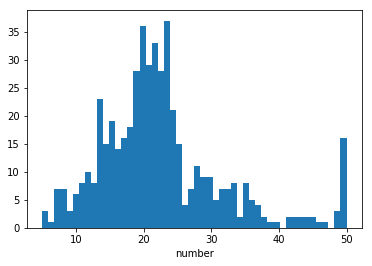

In [7]:
plt.hist(boston.target, bins= 50)
plt.xlabel("number")

Text(0,0.5,'price in $1000')

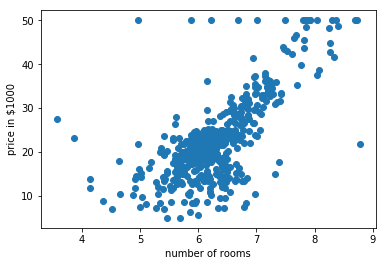

In [8]:
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel("number of rooms")
plt.ylabel("price in $1000")

In [9]:
boston_df = DataFrame(boston.data)

In [10]:
boston_df.columns = boston.feature_names

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df["Price"]= boston.target

C:\Users\Samix\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


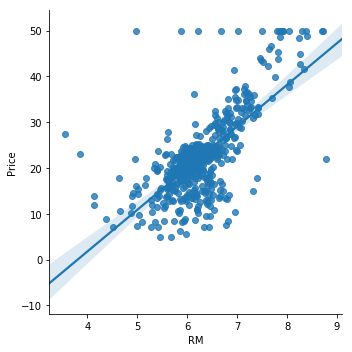

In [13]:
sns.lmplot('RM', 'Price', data= boston_df )

In [14]:
x = boston_df.RM

In [15]:
#x= np.vstack(x)

In [16]:
y = boston_df.Price

In [17]:
x = np.array( [[v,1] for v in x])

In [18]:
x

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [19]:
m, b = np.linalg.lstsq(x,y)[0]

C:\Users\Samix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


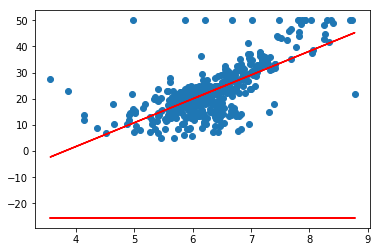

In [20]:
plt.plot(boston_df.RM, boston_df.Price,"o")
x2= boston_df.RM

plt.plot(x2, m*x + b, "r" )

In [21]:
result = np.linalg.lstsq(x,y)

C:\Users\Samix\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [22]:
error_total = result[1]

In [23]:
rmse =np.sqrt(error_total /len(x))

In [24]:
rmse

array([6.60307139])

In [53]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [26]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
lreg.fit(boston_df.drop("Price",1), boston_df.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lreg.intercept_ 

36.491103280361656

In [29]:
lreg.coef_ 

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [30]:
coef_df = DataFrame(boston_df.drop("Price",1).columns)
coef_df.columns = ["Features"]
coef_df ["Coef Estimates"]=  lreg.coef_ 

coef_df

,Features,Coef Estimates
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [31]:
from  sklearn import  cross_validation

X_train, X_test, Y_train, Y_test= sklearn.cross_validation.train_test_split(x, boston_df.Price)

In [32]:
X_train 

array([[6.98 , 1.   ],
       [6.041, 1.   ],
       [5.928, 1.   ],
       [6.185, 1.   ],
       [8.266, 1.   ],
       [8.297, 1.   ],
       [5.898, 1.   ],
       [6.749, 1.   ],
       [5.987, 1.   ],
       [7.041, 1.   ],
       [6.24 , 1.   ],
       [5.344, 1.   ],
       [5.961, 1.   ],
       [6.279, 1.   ],
       [5.594, 1.   ],
       [6.696, 1.   ],
       [3.561, 1.   ],
       [6.083, 1.   ],
       [5.39 , 1.   ],
       [6.715, 1.   ],
       [4.138, 1.   ],
       [5.706, 1.   ],
       [5.813, 1.   ],
       [6.874, 1.   ],
       [5.983, 1.   ],
       [6.458, 1.   ],
       [6.812, 1.   ],
       [6.487, 1.   ],
       [6.442, 1.   ],
       [6.003, 1.   ],
       [4.88 , 1.   ],
       [6.095, 1.   ],
       [5.99 , 1.   ],
       [5.926, 1.   ],
       [6.59 , 1.   ],
       [5.628, 1.   ],
       [6.389, 1.   ],
       [5.39 , 1.   ],
       [6.129, 1.   ],
       [6.286, 1.   ],
       [6.335, 1.   ],
       [5.637, 1.   ],
       [5.985, 1.   ],
       [6.8

In [33]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [40]:
print( np.mean((Y_train- pred_train)**2))
print( np.mean((Y_test- pred_test)**2))

44.93025776109232
39.974838081215765


Text(0.5,1,'Residual Plot')

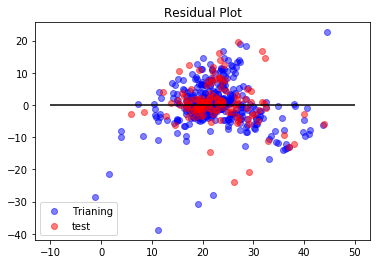

In [52]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha= .5)
test =  plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha= .5)
plt.hlines(y=0, xmin= -10, xmax =50)
plt.legend((train,test), ("Trianing", "test"), loc = "lower left")
plt.title("Residual Plot")